# KNN Classifier

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

K-nearest neighbors (KNN) is a type of **supervised** learning algorithm used for both regression and classification.

For classification and regression whe have to follow the next steps for K = 3.

### Step 1

Look the data.

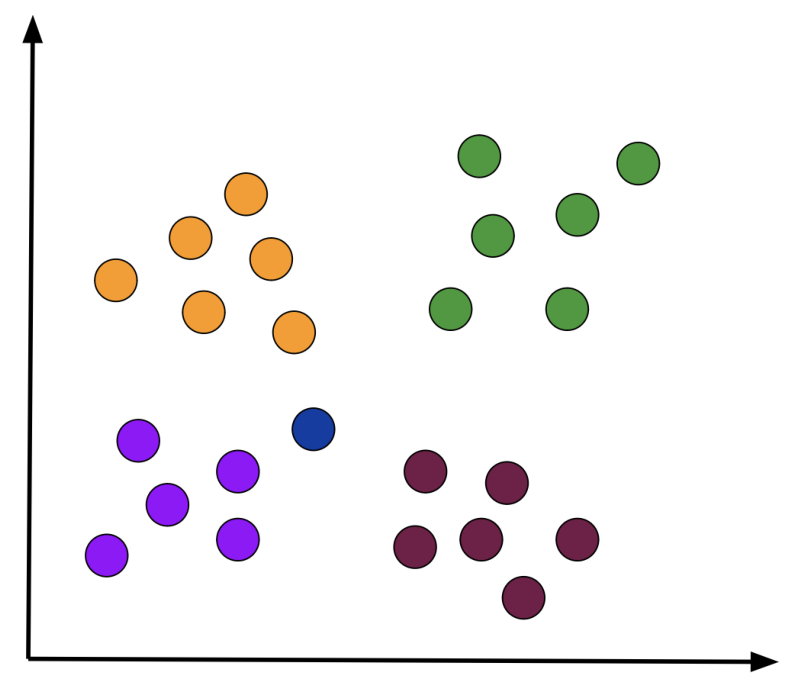

In [4]:
display_img('Step_1.png', 10, 10)

### Step 2

Determine the first neighbor.

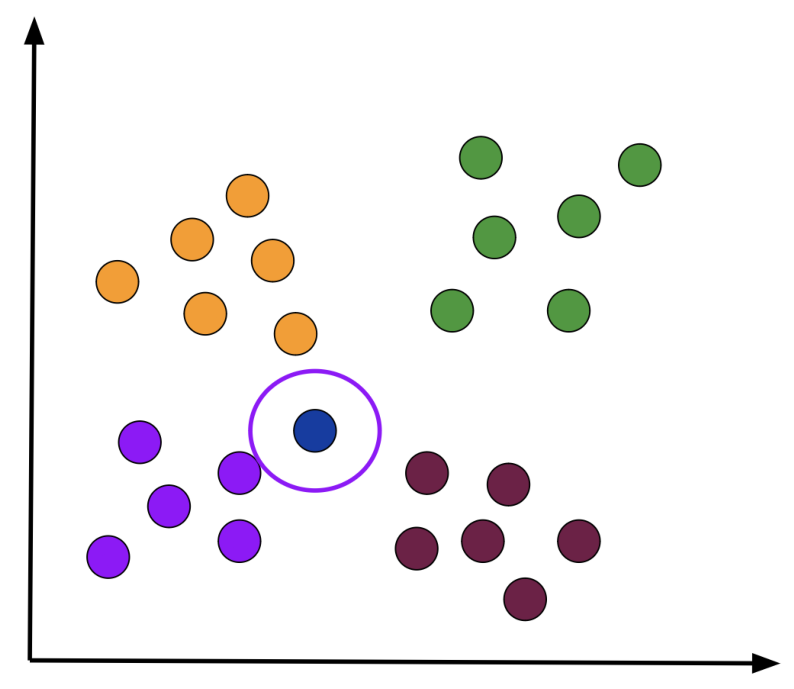

In [5]:
display_img('Step_2.png', 10, 10)

### Step 3

Determine the second neighbor.

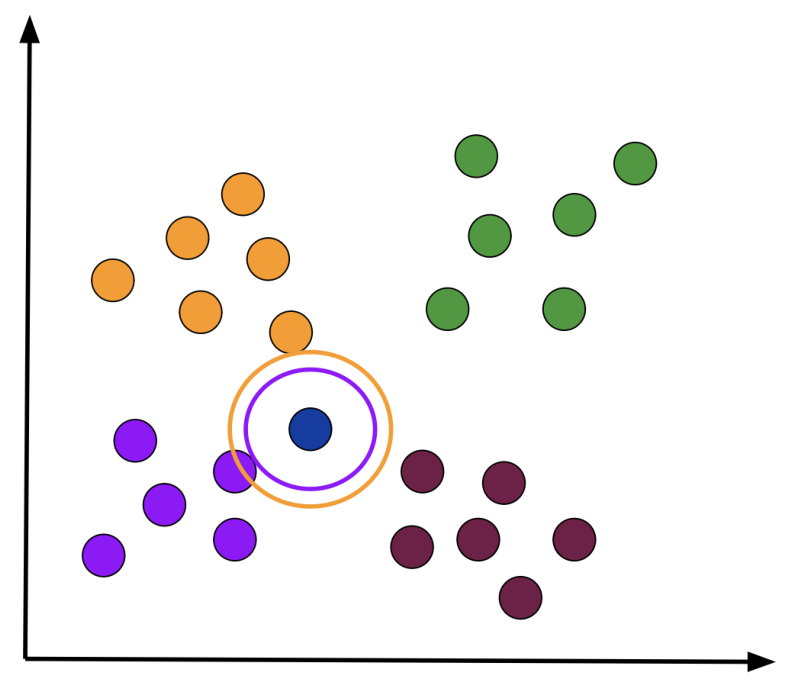

In [6]:
display_img('Step_3.png', 10, 10)

### Step 4

Determine the third neighbor.

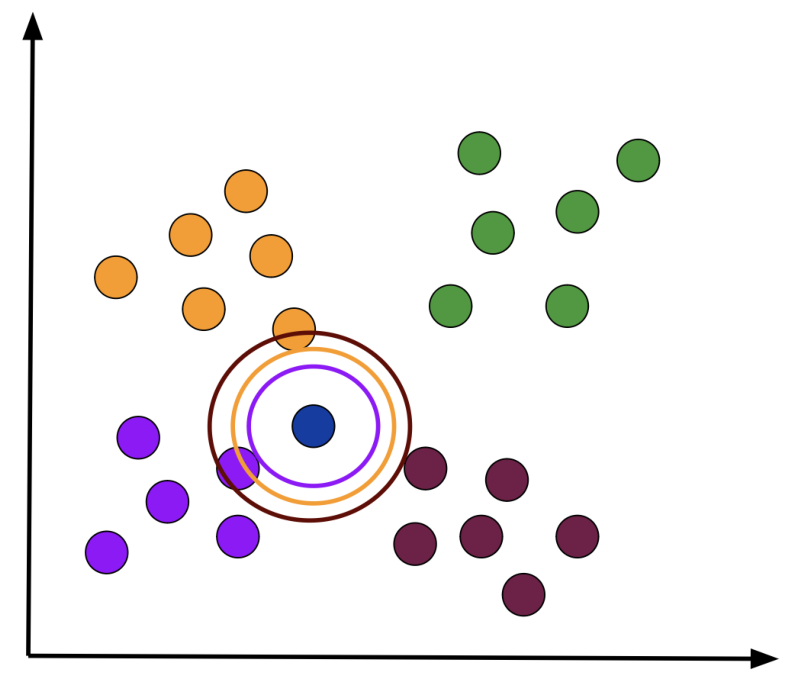

In [7]:
display_img('Step_4.png', 10, 10)

### Step 5

Consider the $K=3$ neighbors for:

* Classification: The class belongs the blue point is the majority. We can consider more importance to differents points in function its distance (for example more importance to the purple point).
* Regression: The value belongs the blue point is the average of all the points. We can consider more importance to differents points in function its distance (for example more importance to the purple point) using weighted average.

In [8]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [9]:
df = pd.read_csv('credit_risk.csv')

In [10]:
cat_str = ['person_home_ownership', 'loan_intent']
cat_oh = ['cb_person_default_on_file', 'loan_grade']

num_mean = ['person_age', 'person_income', 'loan_percent_income']

num_mean_nan = ['loan_int_rate', 'person_emp_length']
num_zero_nan = ['loan_amnt']

X_cols = cat_str + cat_oh + num_mean + num_mean_nan + num_zero_nan

label = 'loan_status'

### ii. Drop 'y' NaNs

In [11]:
df = df[df[label].notna()]

### iii. Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features_dict = {
    'cat_str': cat_str,
    'cat_oh': cat_oh,
    'num_mean': num_mean,
    'num_mean_nan': num_mean_nan,
    'num_zero_nan': num_zero_nan
}

In [14]:
X = df[X_cols].copy()
y = df[label].copy()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state = 10)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 10)

### iv. Fit preprocess

In [16]:
from preprocessing import *

In [17]:
transformers_pre = get_fit_transfomers(features_dict, X_train, y_train)

In [18]:
y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

y_val = y_val.reset_index()
y_val = y_val.drop(columns = ['index'])

y_test = y_test.reset_index()
y_test = y_test.drop(columns = ['index'])

In [19]:
X_train = transform_datasets(transformers_pre, features_dict, X_train)

X_val = transform_datasets(transformers_pre, features_dict, X_val)

X_test = transform_datasets(transformers_pre, features_dict, X_test)

### v. Train model (with Fine Tunning)

In [20]:
from sklearn.metrics import f1_score

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
N_neigh = 20

In [23]:
N_n = [i for i in range(1, N_neigh + 1)]

In [24]:
threshold = round(y_val['loan_status'].mean(), 2)

In [25]:
all_f1_train = []
all_f1_val = []
all_params = []

for n_n in N_n:

    print('Number of Neighbors: ', n_n)

    clf = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
          metric_params = None, n_jobs = 1, n_neighbors = n_n, p=2,
          weights='uniform')

    clf = clf.fit(X_train, y_train)

    y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
    y_val_pred_prob = clf.predict_proba(X_val)[:, 1]

    y_train_pred = (y_train_pred_prob >= threshold)*1
    y_val_pred = (y_val_pred_prob >= threshold)*1

    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)

    all_f1_train.append(f1_train)
    all_f1_val.append(f1_val)
    all_params.append(n_n)
    
    print('-'*70)

all_f1_train = np.array(all_f1_train)
all_f1_val = np.array(all_f1_val)
all_params = np.array(all_params)

Number of Neighbors:  1
----------------------------------------------------------------------
Number of Neighbors:  2
----------------------------------------------------------------------
Number of Neighbors:  3
----------------------------------------------------------------------
Number of Neighbors:  4
----------------------------------------------------------------------
Number of Neighbors:  5
----------------------------------------------------------------------
Number of Neighbors:  6
----------------------------------------------------------------------
Number of Neighbors:  7
----------------------------------------------------------------------
Number of Neighbors:  8
----------------------------------------------------------------------
Number of Neighbors:  9
----------------------------------------------------------------------
Number of Neighbors:  10
----------------------------------------------------------------------
Number of Neighbors:  11
------------------------

In [26]:
f1_train_opt = all_f1_train[all_f1_val == all_f1_val.max()][0]
f1_val_opt = all_f1_val[all_f1_val == all_f1_val.max()][0]
N_n_opt = all_params[all_f1_val == all_f1_val.max()][0]

In [27]:
print('F1 Train:', round(f1_train_opt*100, 2))
print('F1 Val:', round(f1_val_opt*100, 2))
print('N neighbors opt:', N_n_opt)
print('Threshold:', threshold)

F1 Train: 68.13
F1 Val: 64.77
N neighbors opt: 14
Threshold: 0.22


### vi. Train definitive model

In [28]:
clf = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
          metric_params = None, n_jobs = 1, n_neighbors = N_n_opt, p=2,
          weights='uniform')

In [29]:
clf = clf.fit(X_train, y_train)

In [30]:
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
y_val_pred_prob = clf.predict_proba(X_val)[:, 1]
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

y_train_pred = (y_train_pred_prob >= threshold)*1
y_val_pred = (y_val_pred_prob >= threshold)*1
y_test_pred = (y_test_pred_prob >= threshold)*1

f1_train = f1_score(y_train, y_train_pred)
f1_val = f1_score(y_val, y_val_pred)
f1_test = f1_score(y_test, y_test_pred)

In [31]:
print('F1 Train:', round(f1_train*100, 2))
print('F1 Val:', round(f1_val*100, 2))
print('F1 Test:', round(f1_test*100, 2))

F1 Train: 68.13
F1 Val: 64.77
F1 Test: 65.16


### vii. Calibration

How the model have a calibrator, this step it's not necessary.

### viii. Report Calibration

In [32]:
from sklearn.calibration import calibration_curve

In [33]:
def calibration(y, y_pred):

    scores, probs = calibration_curve(y, y_pred, n_bins = 10, normalize = True)

    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect Calibration')
    plt.plot(probs, scores, marker = '.', label = 'Real Calibration')
 
    leg = plt.legend(loc = 'upper left')

    plt.xlabel('Probability on each bin')
    plt.ylabel('Real probability on each bin')

    plt.title('Calibration')
    plt.show()

**Train:**

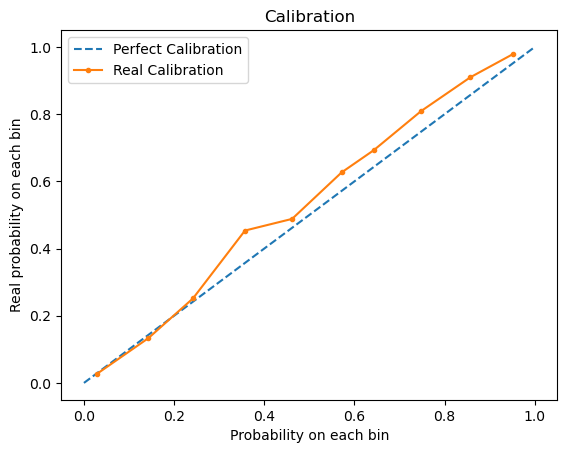

In [34]:
calibration(y_train, y_train_pred_prob)

**Val:**

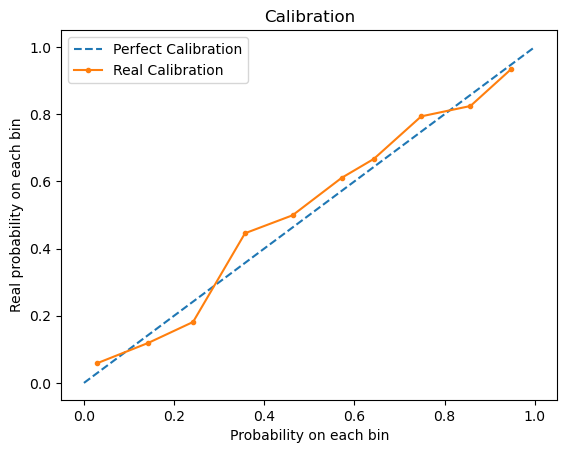

In [35]:
calibration(y_val, y_val_pred_prob)

**Test:**

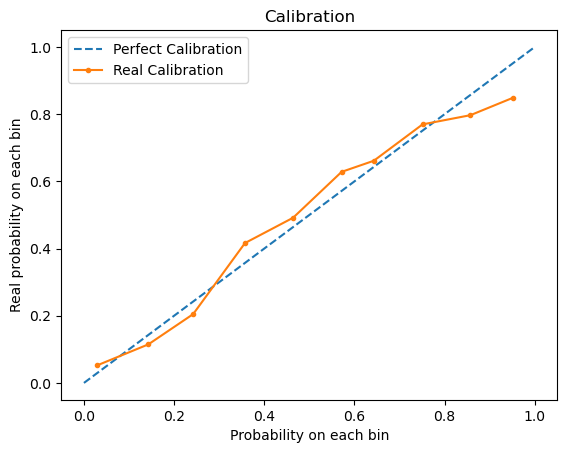

In [36]:
calibration(y_test, y_test_pred_prob)

### ix. Confidence Interval

When we have the probabilities $(MP)$ given by a model and the real probabilities $(RP)$ we can define the next random variable:

$ e = RP - MP $

When we have $n$ observations we have:

$ e_i = RP_i - MP_i \ \forall i \in \lbrace 1, ..., n \rbrace $

We can compute $ S $ and $ \bar{e} $ as follows:

$ \bar{e} = \frac{1}{n} \sum_{i=1}^n e_i $

$ S = \sqrt{\cfrac{1}{(n-1)} \cdot \sum_{i=1}^n (e_i - \bar{e})^2} $

Asumming $ e \sim Normal $ we can say that:

$ \bar{e} - S \cdot 1.96 + MP_i \leq RP_i \leq \bar{e} + S \cdot 1.96 + MP_i $     $ \forall i \in \lbrace 1, ..., n \rbrace$  with $ 95 \% $ of confidence.

And also:

$ \bar{e} - \cfrac{S}{\sqrt{n}} \cdot 1.96 + \bar{MP} \leq \bar{RP} \leq \bar{e} + \cfrac{S}{\sqrt{n}} \cdot 1.96 + \bar{MP} $  with $ 95 \% $ of confidence.

In [37]:
real_probs_val, model_probs_val = calibration_curve(y_val, y_val_pred_prob, n_bins = 100, normalize = True)

In [38]:
df_ci_val = pd.DataFrame(zip(model_probs_val, real_probs_val))
df_ci_val = df_ci_val.rename(columns = {0: 'model_prob', 1: 'real_prob'})
df_ci_val['error'] = df_ci_val['real_prob'] - df_ci_val['model_prob']

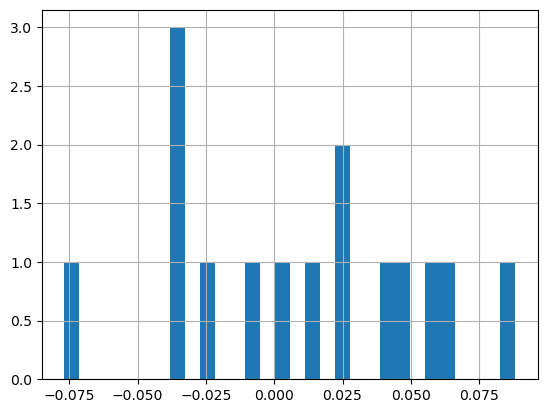

In [39]:
df_ci_val['error'].hist(bins = 30)
plt.show()

**Comments:** The distribution are very similar to a Normal.

In [40]:
bar_e = df_ci_val['error'].mean()
S = df_ci_val['error'].std()

In [41]:
round(bar_e*100, 2), round(S*100, 2)

(1.05, 4.61)

### x. Patterns

**Loan Grade vs Loan Status**

In [42]:
X_test['predict'] = y_test_pred

In [43]:
round(X_test[X_test['loan_grade_A'] == 1]['predict'].mean()*100, 2)

11.0

In [44]:
round(X_test[X_test['loan_grade_B'] == 1]['predict'].mean()*100, 2)

19.57

In [45]:
round(X_test[X_test['loan_grade_C'] == 1]['predict'].mean()*100, 2)

23.15

In [46]:
round(X_test[X_test['loan_grade_D'] == 1]['predict'].mean()*100, 2)

93.57

In [47]:
round(X_test[X_test['loan_grade_E'] == 1]['predict'].mean()*100, 2)

96.28

In [48]:
round(X_test[X_test['loan_grade_F'] == 1]['predict'].mean()*100, 2)

85.0

In [49]:
round(X_test[X_test['loan_grade_G'] == 1]['predict'].mean()*100, 2)

89.47

In [50]:
X_test = X_test.drop(columns = ['predict'])

### xi. Feature importance

K-NN does not provide a prediction for feature importance or coefficients.

### xii. Explainability

In [51]:
import shap

In [52]:
N_shap = 100

In [53]:
X_test = X_test[0: N_shap]

In [54]:
explainer = shap.KernelExplainer(clf.predict_proba, X_test)

In [55]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/100 [00:00<?, ?it/s]

In [56]:
df_shap_values = pd.DataFrame(shap_values[0])
df_shap_values.columns = X_train.columns

**Importance Variable**

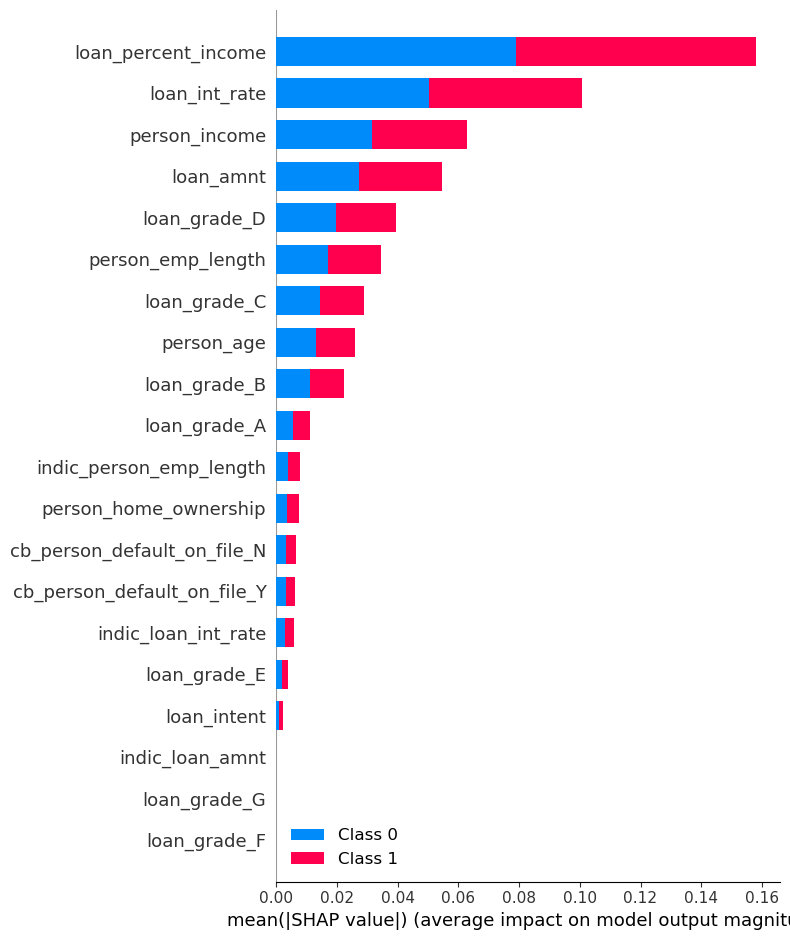

In [57]:
shap.summary_plot(shap_values, X_test)

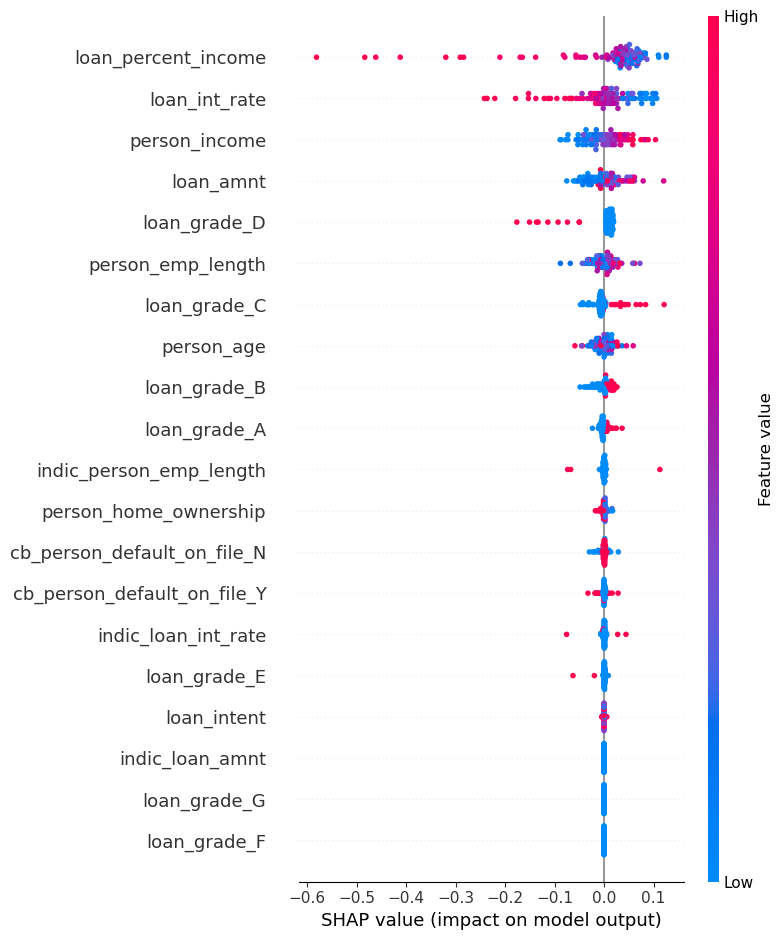

In [58]:
shap.summary_plot(shap_values[0], X_test, plot_type = 'dot')

In [59]:
df_shap_values['partial_sum_SHAP'] = df_shap_values.sum(axis = 1)

In [60]:
df_shap_values = df_shap_values[['partial_sum_SHAP']]

In [61]:
df_shap_values['prob_model'] = y_test_pred_prob[0: N_shap]

**Sum of SHAP Values**

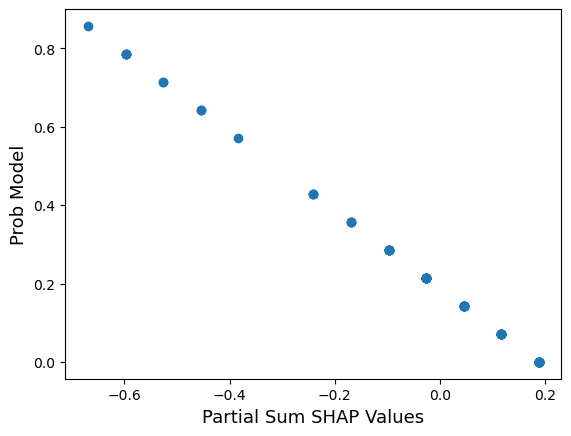

In [62]:
plt.scatter(df_shap_values['partial_sum_SHAP'], df_shap_values['prob_model'])
plt.xlabel('Partial Sum SHAP Values', fontsize = 13)
plt.ylabel('Prob Model', fontsize = 13)
plt.show()

**SHAP dependency**

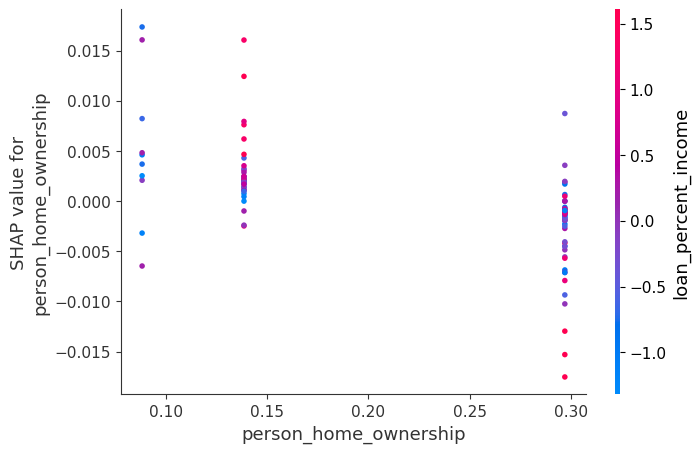

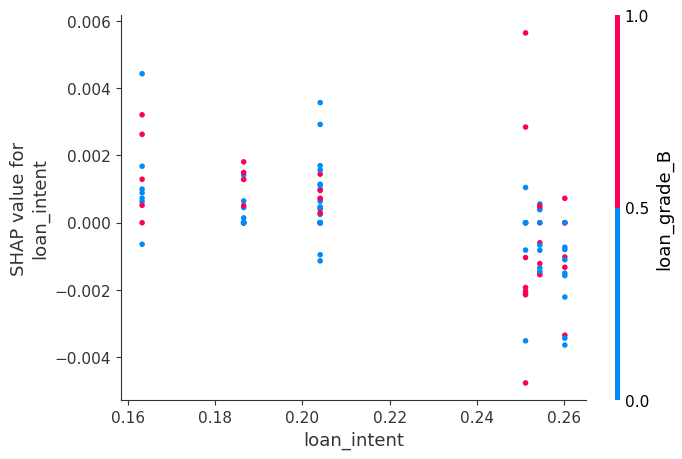

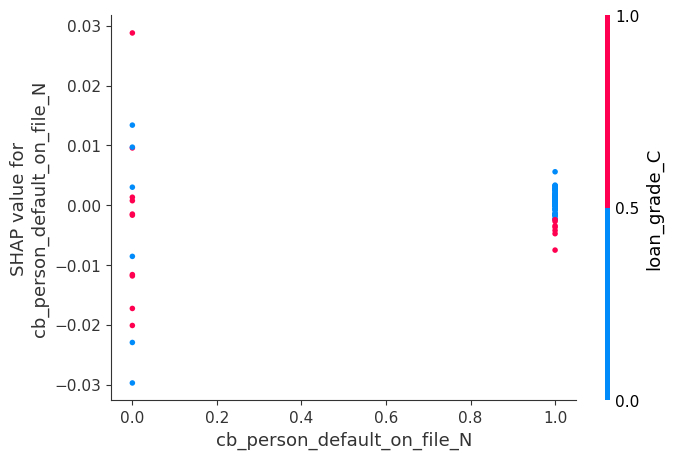

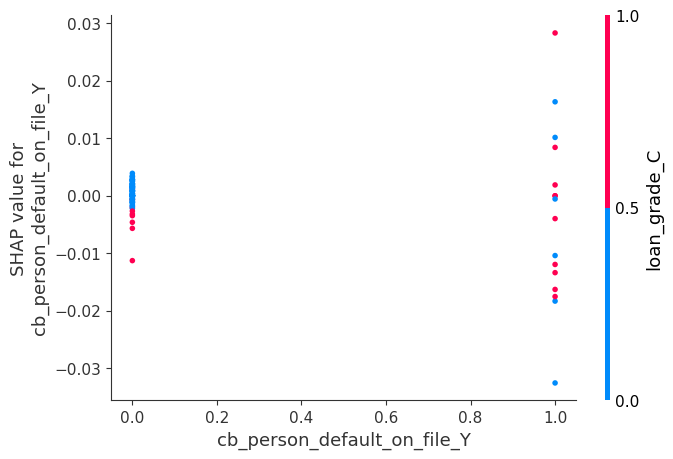

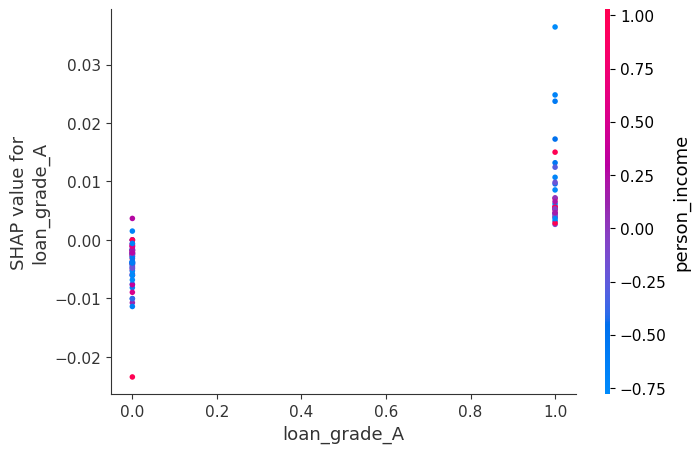

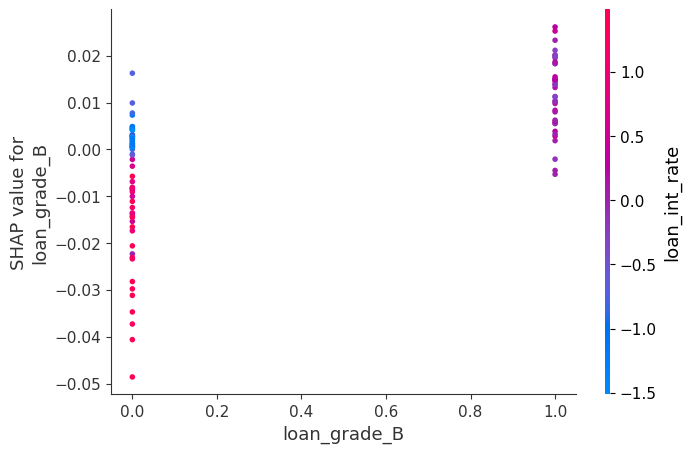

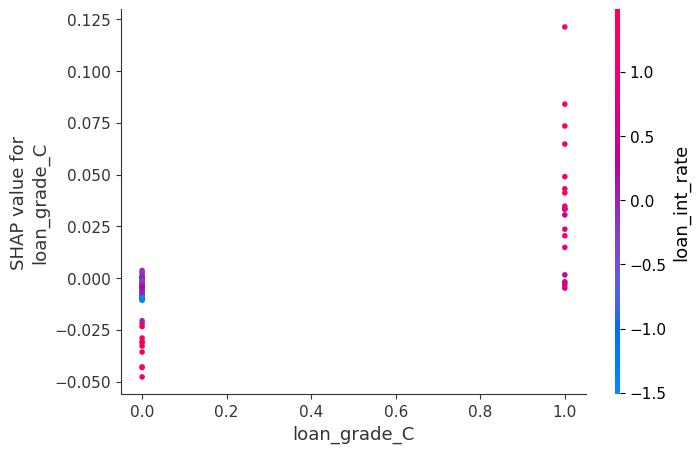

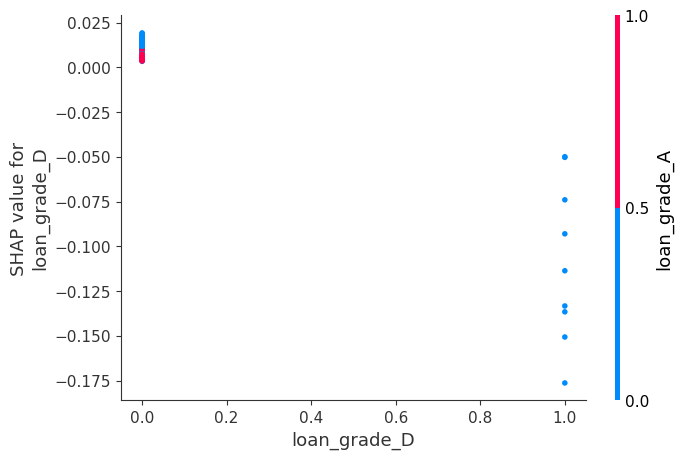

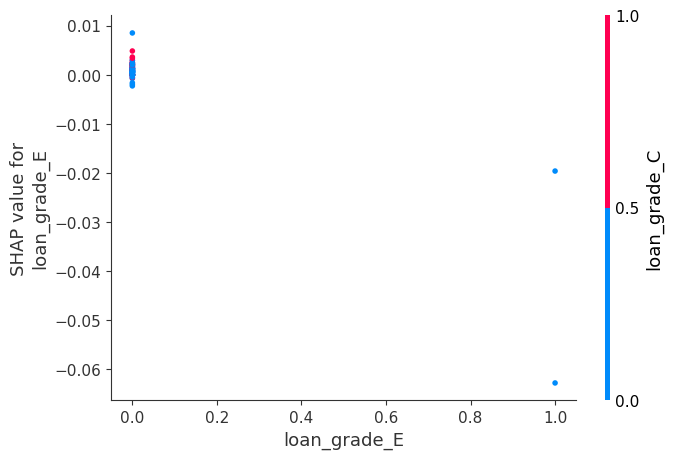

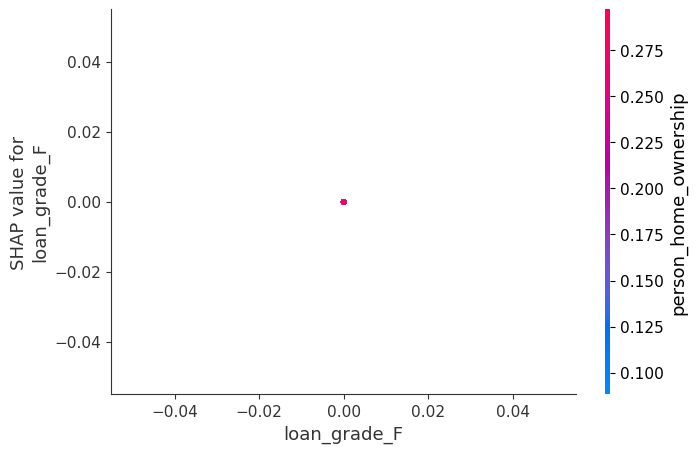

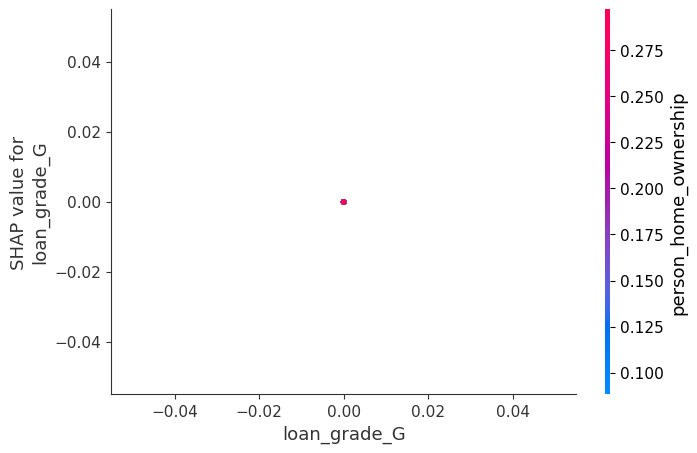

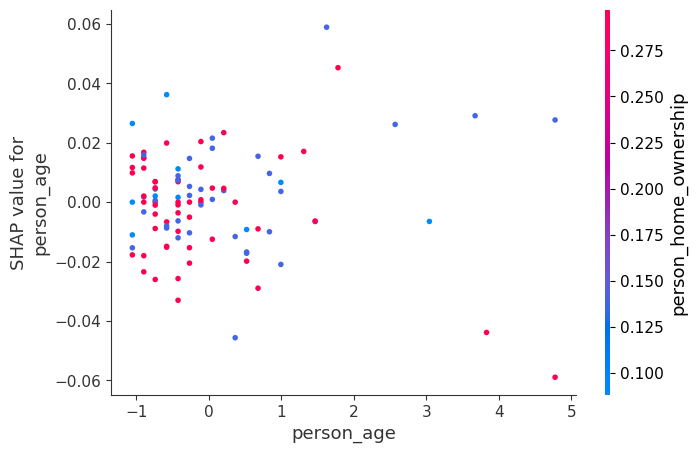

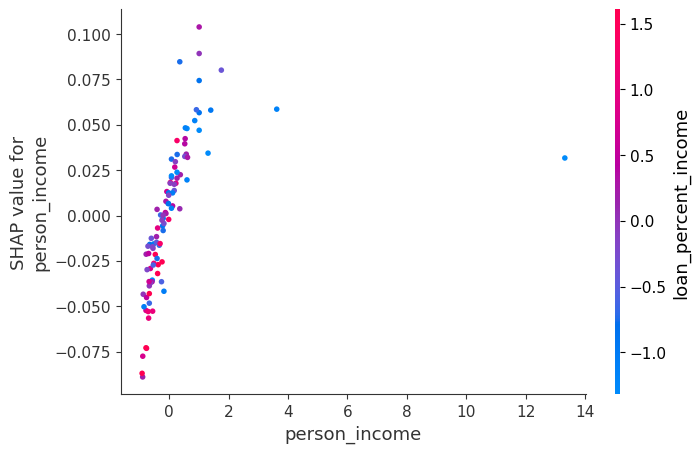

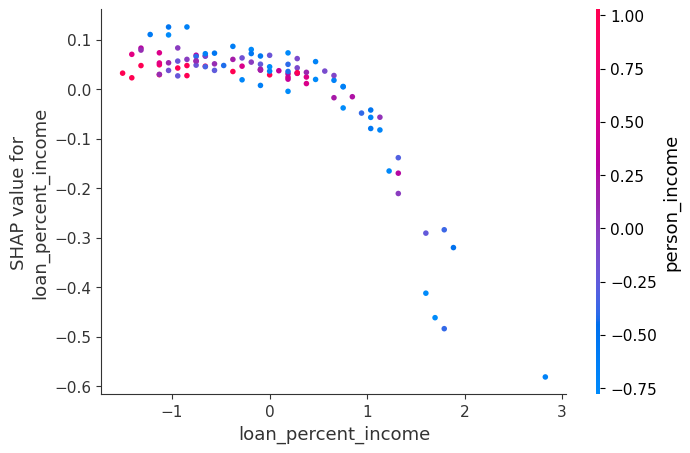

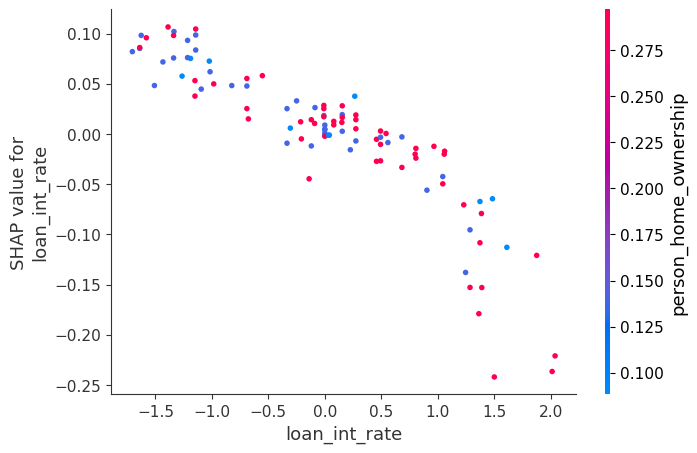

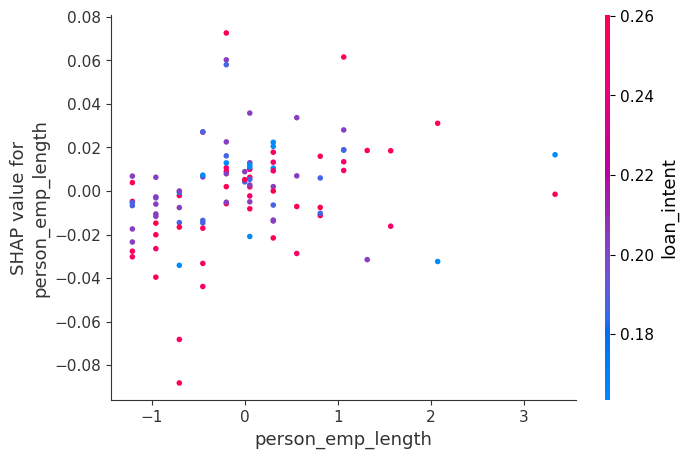

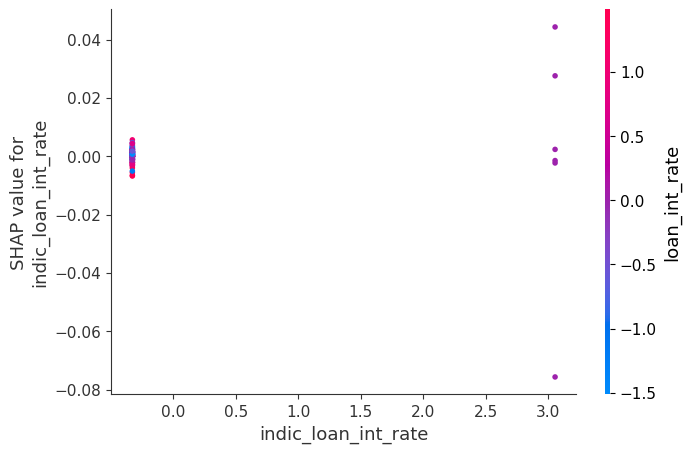

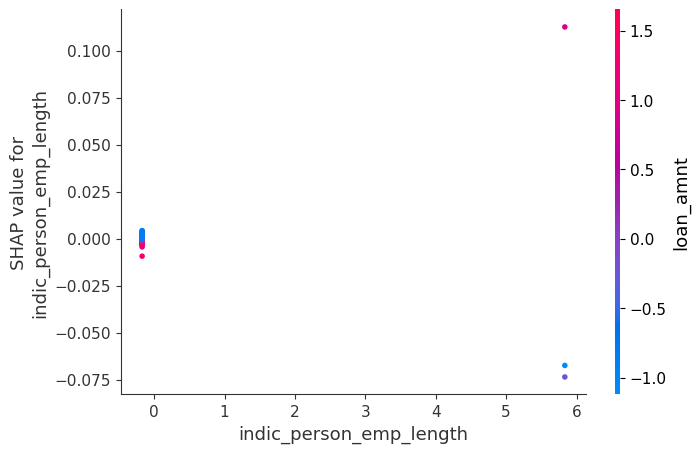

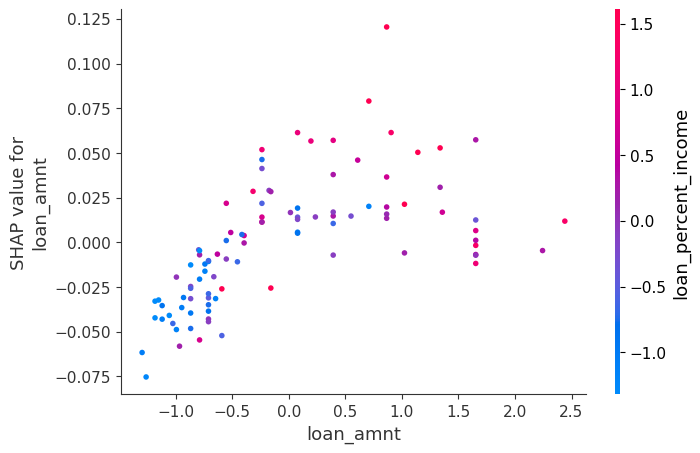

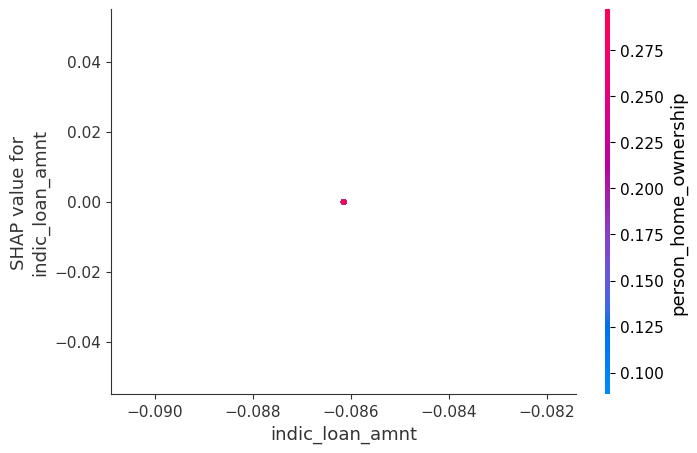

In [63]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values[0], X_test)

### Time of execution

In [64]:
end = time.time()

In [65]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 11 minutes and 5 seconds.
